# Aula prática - Modulação
* Disciplina: Sistemas de comunicação
* Professor: Carmelo José Albanez Bastos Filho
* Estagiário: Gabriel Alves de Lima (gal@ecomp.poli.br)

## Definição

A técnica de modulação consiste em codificar uma informação (i.e. um sinal) em uma onda portadora, que é um sinal periódico bem comportado. Isto é realizado pela alteração de parâmetros, como a frequência, a amplitude e a fase da onda portadora.

![Exemplo de modulação](static/image/amplitudemodulation-1.png)

A aplicação desta técnica produz um sinal resultante cuja transmissão demonstra grandes vantagens para a transmissão do sinal como serão discutidas na próxima seção se comparados com a transmissão do sinal em banda base. Para extrair a informação deste sinal resultante, aplica-se o processo de *demodulação*, que deve apresentar como resposta a informação original. 

## Motivação

Vejamos três aspectos em que a utilização de modulação pode ser bastante proveitoso.

### Evitar a mistura de sinais distintos

Imagine que você está participando da cerimônia de abertura de um evento e existem muitas pessoas conversando entre si no recinto. Caso você queira conversar com alguém em específico, será difícil transmitir um sinal sem ruído para alguém, pois além da sua própria voz (que deve estar contida entre $20Hz$ e $20kHz$), existirão outras vozes emitidas no mesmo canal (i.e. no ar). Separar o sinal de interesse dentre os tantos outros ruídos pode ser uma tarefa difícil.

Modulação pode ser aplicada com o objetivo de codificar sinais diferentes em bandas de frequência distintas e não sobrepostas. Assim, de posse de um demodulador, será possível escolher qual dos sinais presentes no mesmo canal é o sinal de interesse e receber a informação sem ruídos! Esta técnica é chamada de multiplexação, que consiste no aproveitamento de um mesmo canal de transmissão para envio de mais de um sinal.

### Redução da altura de antenas

Para transmitir sinais de rádio, a altura da antena deve ser múltiplo de $\dfrac{\lambda}{4}$, onde $\lambda$ é o comprimento de onda do sinal.

$$\lambda = \dfrac{c}{f}$$

Nesta equação, $c$ é a velocidade da luz e $f$ é a frequência do sinal a ser transmitido. Sabendo disto, a altura mínima necessária $h_1$ para transmitir um sinal tal que $f = 10kHz$ pode ser calculada da seguinte forma:

\begin{align}
h_1 &= \dfrac{\lambda}{4}\\
h_1 &= \dfrac{c}{4f}\\
h_1 &= \dfrac{3.0 \times 10^8}{4 \times 10 \times 10^3} \therefore h_1 = 7500m
\end{align}

Só para ter uma noção, esta altura é quase do tamanho do Monte Everest (8848m)! Se conseguissemos transmitir este mesmo sinal porém codificado em um sinal de $f = 1MHz$, o tamanho mínimo da antena $h_2$ seria:

\begin{align}
h_2 &= \dfrac{\lambda}{4}\\
h_2 &= \dfrac{c}{4f}\\
h_2 &= \dfrac{3.0 \times 10^8}{4 \times 10 \times 10^6} \therefore h_2 = 75m
\end{align}

Desta forma é factível construir tal antena.

### Aumento do raio de comunicação

Sinais de baixa frequência não podem ser transmitidos por longas distâncias, pois estes podem ser significativamente atenuados. Com o aumento da frequência, este nível de atenuação pode ser reduzido e o sinal pode percorre maiores distâncias. Como modulação pode ser usado para codificar uma informação em um sinal de alta frequência, este sinal modulado pode ser transmitido para maiores distâncias.

## Objetivo da aula

Vamos ver na prática como realizar a modulação de sinais analógicos e digitais em diferentes aspectos. Vamos utilizar python para implementar os códigos necessários. Vamos começar com os sinais analógicos para demonstrar os principais conceitos e depois vamos aplicar o conhecimento adquirido na modulação de sinais digitais.

## Prática com sinais analógicos



In [1]:
# Show plots below code (Specific to ipython notebooks)
%matplotlib inline

# Importing everything we are going to need
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, convolve, hilbert, square

In [2]:
# Function to plot signal data
# Source: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
def plot_signal(figure, title, data):
    plt.figure(figure)
    plt.title(title)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.plot(data[0], data[1])
    
# Function to plot data in frequency domain
# Source: https://www.mathworks.com/help/matlab/ref/fft.html
def plot_frequency(figure, data, sampling_rate, points=[]):
    s = np.fft.fft(data)
    data_length = data.shape[0]
    p2 = np.abs(s / data_length)
    p1 = p2[0:int(round(data_length / 2))]
    p1[1:] = 2 * p1[1:];
    domain = sampling_rate * np.arange(0, data_length / 2) / data_length
    
    plt.figure(figure)
    plt.plot(domain, p1)
    
    for point in points:
        x = point
        y = p1[np.abs(domain - x).argmin() + 1]
        plt.plot(x, y, 'r*')

# Function to plot a signal modulation result in the time domain
def plot_time_modulation(figure, signal, carrier, modulated, domain):
    plt.figure(figure, figsize=(16, 5), dpi= 80)
    plt.subplot(131)
    plt.title('Signal')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.plot(domain, signal)
    
    plt.subplot(132)
    plt.title('Carrier')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.plot(domain, carrier)
    
    plt.subplot(133)
    plt.title('Modulated signal')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.plot(domain, modulated)
    plt.plot(domain, signal)
    

In [3]:
sampling_rate = 10000
signal_duration = 0.05  # seconds

sampling_period = 1.0 / sampling_rate   # seconds
signal_domain = np.linspace(0, signal_duration, int(sampling_rate * signal_duration))

f_signal = 50       # Hz
f_carrier = 800     # Hz

### Modulação em amplitude (AM)

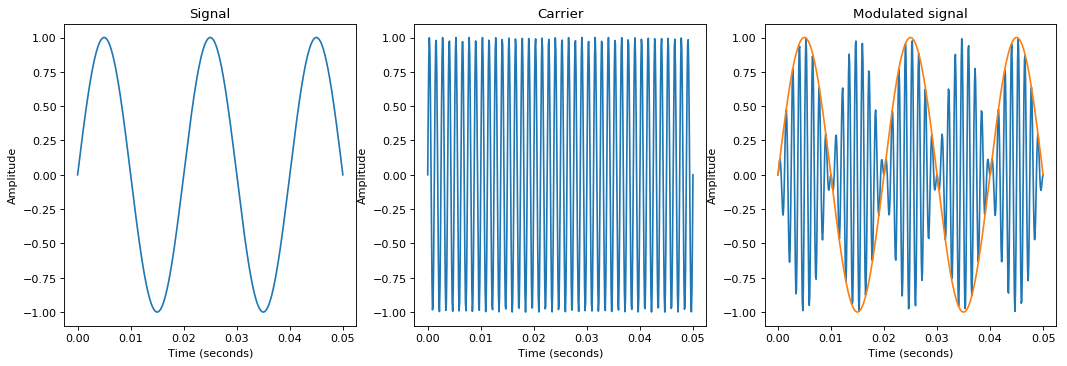

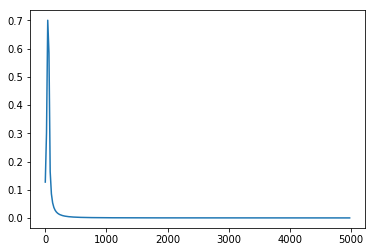

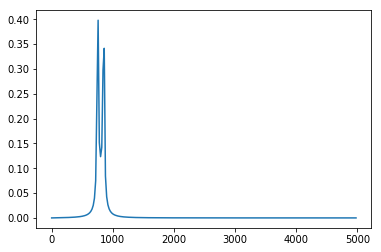

In [4]:
signal = np.sin(2 * np.pi * signal_domain * f_signal)
carrier = np.sin(2 * np.pi * signal_domain * f_carrier)

am = signal * carrier
plot_time_modulation(1, signal, carrier, am, signal_domain)
plot_frequency(2, signal, sampling_rate)
plot_frequency(3, am, sampling_rate)

### Demodulação AM usando filtros

Existem diversas maneiras. Uma destas utiliza o processo de filtragem a partir do sinal modulado.

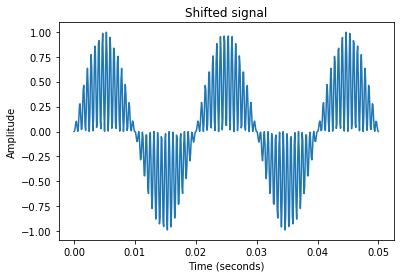

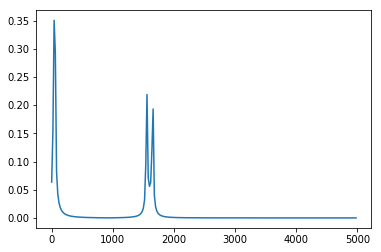

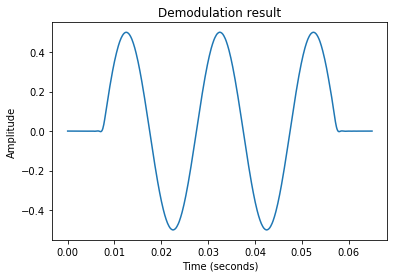

In [5]:
shifted_am = am * carrier
f = firwin(151, f_carrier / (sampling_rate / 2))
result = convolve(shifted_am, f)
filtered_domain = np.linspace(0, result.shape[0] * sampling_period, result.shape[0])

plot_signal(1, 'Shifted signal', (signal_domain, shifted_am))
plot_frequency(2, shifted_am, sampling_rate)

plot_signal(3, 'Demodulation result', (filtered_domain, result))

### Modulação em frequência (FM)

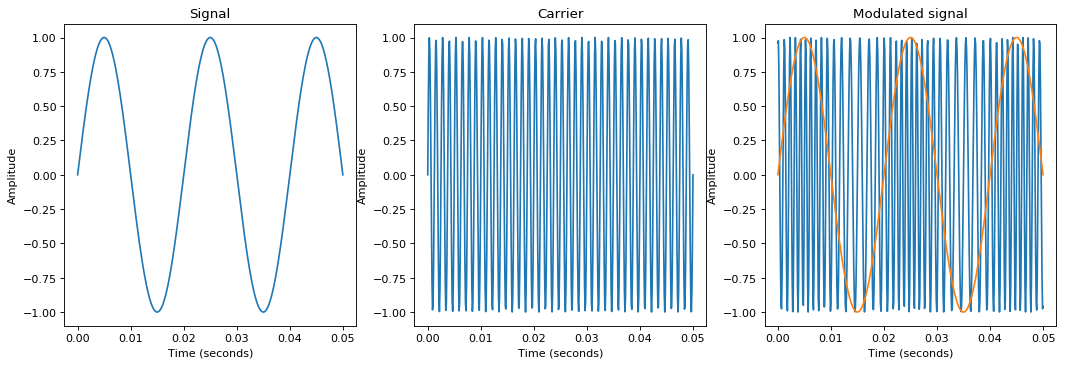

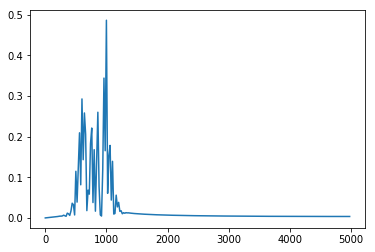

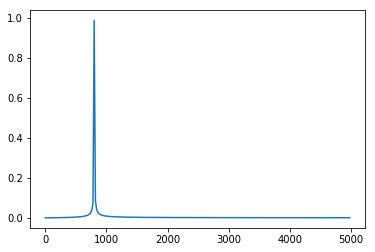

In [6]:
modulation_index = 5.0
shifted_signal = -np.cos(2.0 * np.pi * signal_domain * f_signal)

fm = np.sin(2.0 * np.pi *  signal_domain * f_carrier + modulation_index * shifted_signal)
plot_time_modulation(1, signal, carrier, fm, signal_domain)
plot_frequency(2, fm, sampling_rate)
plot_frequency(3, carrier, sampling_rate)

### Demodulação FM usando transformada de Hilbert

A transformada de Hilbert é uma ferramenta matemática muito útil em processamento de sinais capaz de obter parametros, tais como o envelope em amplitude, a frequência e a fase instantânea. Estes podem ser valores úteis para detectar alterações no sinal modulado. Para modulação em frequência, identificar a frequência instantânea pode ajudar a identificar variações da frequência provocados ao sinal portador pelo modulador.

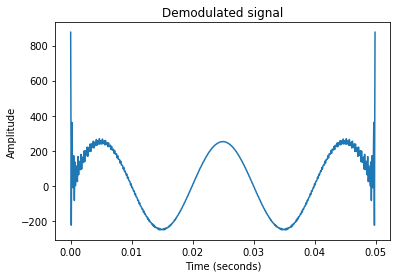

In [7]:
n = hilbert(fm)
instantaneous_phase = np.unwrap(np.angle(n))
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0 * np.pi) * sampling_rate)

demodulated_signal = (instantaneous_frequency - f_carrier)
plot_signal(1, 'Demodulated signal', (signal_domain[:-1], demodulated_signal))

### Modulação em fase (PM)

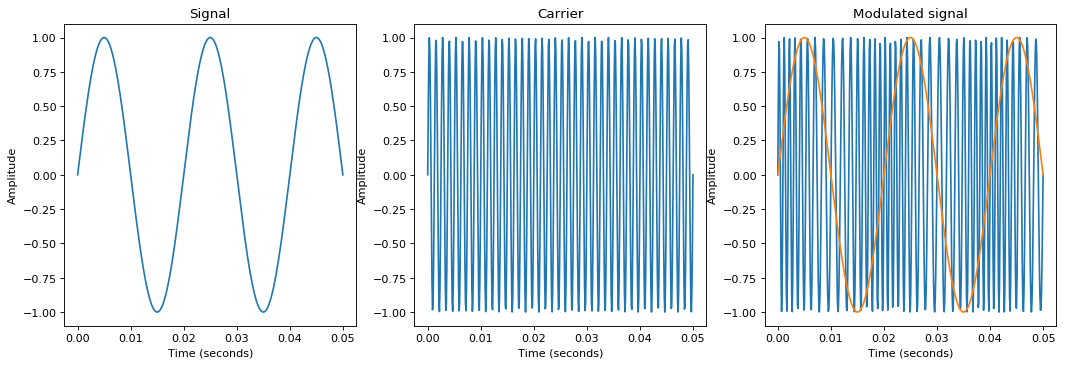

In [8]:
modulation_index = 5.0
pm = np.sin(2.0 * np.pi * signal_domain * f_carrier + modulation_index * signal)
plot_time_modulation(1, signal, carrier, pm, signal_domain)

### Demodulação PM usando transformada de Hilbert

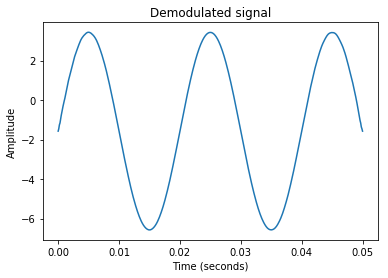

In [9]:
carrier_offset = 2.0 * np.pi * f_carrier * signal_domain
n = hilbert(pm)
instantaneous_phase = np.unwrap(np.angle(n))

demodulated_signal = (instantaneous_phase - carrier_offset)
plot_signal(1, 'Demodulated signal', (signal_domain, demodulated_signal))

## Prática com sinais digitais

### Modulação em amplitude (ASK)

Basta alterar o sinal. A forma de modular o sinal em amplitude permanece a mesma.

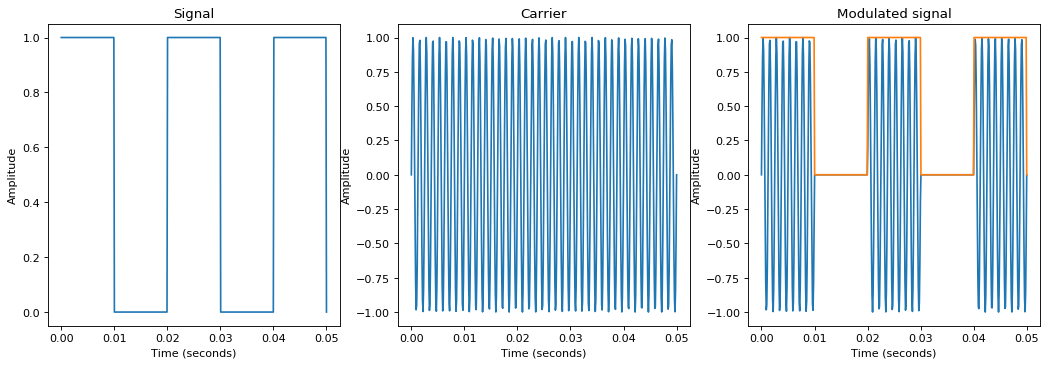

In [10]:
squared_sine = square(2.0 * np.pi * signal_domain * f_signal)
signal = (squared_sine + 1.0) / 2.0
carrier = np.sin(2.0 * np.pi * signal_domain * f_carrier)

ask = signal * carrier
plot_time_modulation(1, signal, carrier, ask, signal_domain)

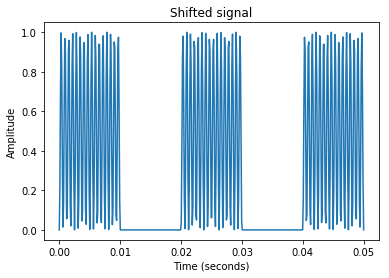

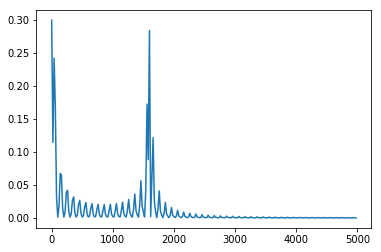

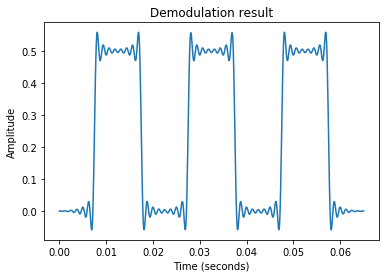

In [11]:
shifted_ask = ask * carrier
f = firwin(151, f_carrier / (sampling_rate / 2))
result = convolve(shifted_ask, f)
filtered_domain = np.linspace(0, result.shape[0] * sampling_period, result.shape[0])

plot_signal(1, 'Shifted signal', (signal_domain, shifted_ask))
plot_frequency(2, shifted_ask, sampling_rate)

plot_signal(3, 'Demodulation result', (filtered_domain, result))

Perceba o ripple presente no sinal resultante. Isto acontece devido a atuação do filtro em um componente de altíssima frequência, que necessita de infinitos componentes da série de fourier para representação fiel do sinal original.

### Modulação em frequência (FSK)

Esta apresenta uma diferença quanto a forma que a frequência é alterada. Se a frequência fosse completamente guiada pelo sinal digital, no valor 0, o resultado seria uma componente de frequência 0. Ou seja, a amplitude também seria alterada. Para resolver tal problema, define-se duas frequências $f_{high}$ e $f_{low}$ que serão os níveis de frequência que o sinal modulado apresentará para diferentes níveis lógicos do sinal modulador. Neste exemplo, vamos fazer $f_{high} = 800Hz$ e $f_{low} = 400Hz$.

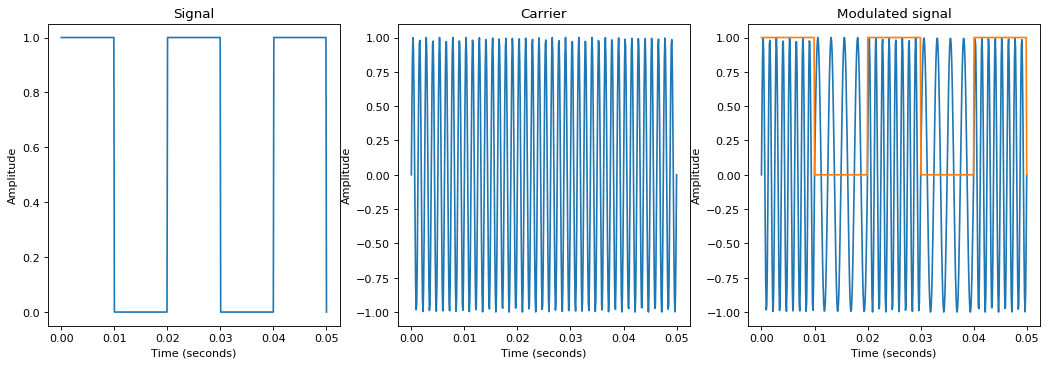

In [12]:
f_high = 800
f_low = 400

carrier_high = np.sin(2.0 * np.pi * signal_domain * f_high)
carrier_low = np.sin(2.0 * np.pi * signal_domain * f_low)

fsk = signal * carrier_high + (1.0 - signal) * carrier_low
plot_time_modulation(1, signal, carrier, fsk, signal_domain)

### Demodulação FSK usando filtros

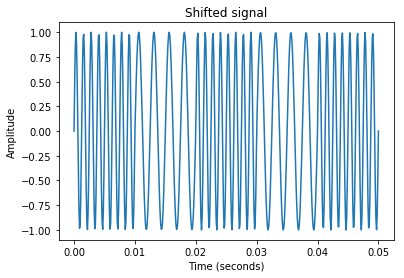

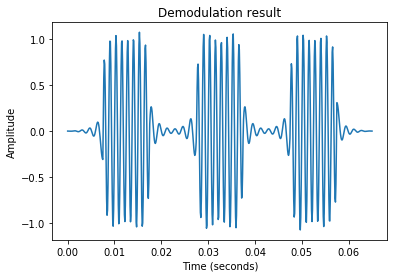

In [13]:
average_f = (f_high + f_low) / 2.0
f = firwin(151, average_f / (sampling_rate / 2), pass_zero=False)
result = convolve(fsk, f)
filtered_domain = np.linspace(0, result.shape[0] * sampling_period, result.shape[0])

plot_signal(1, 'Shifted signal', (signal_domain, fsk))
plot_signal(2, 'Demodulation result', (filtered_domain, result))

Neste ponto, o problema de demodulação FSK é bem similar com a demodulação ASK. A técnica que for utilizada para resolver esta pode resolver o problema. Experimente! Tente completar a demodulação FSK como um problema de demodulação ASK. Isto está incluído nos exercícios.

### Modulação em fase (PSK)

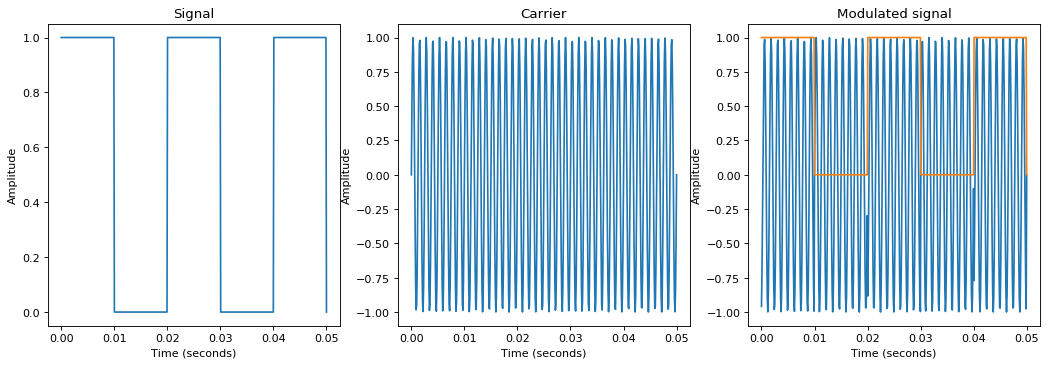

In [14]:
modulation_index = 5.0
psk = np.sin(2.0 * np.pi * signal_domain * f_carrier + modulation_index * signal)
plot_time_modulation(1, signal, carrier, psk, signal_domain)

### Demodulação PSK usando a transformada de Hilbert

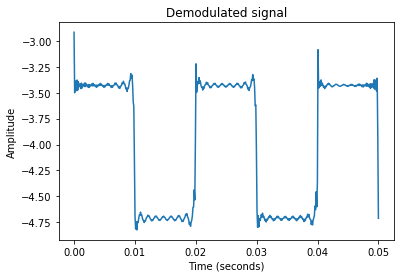

In [15]:
carrier_offset = 2.0 * np.pi * f_carrier * signal_domain
n = hilbert(psk)
instantaneous_phase = np.unwrap(np.angle(n))

demodulated_signal = (instantaneous_phase - carrier_offset) * -1
plot_signal(1, 'Demodulated signal', (signal_domain, demodulated_signal))

## Exercícios

1. Pesquise sobre Phase Locked Loop (PLL) e descreva como este pode ser utilizado para demodular um sinal FM.
2. Pesquise e demonstre matematicamente como pode ser calculada a largura de banda para AM e FM. Compare os resultados e descreva suas conclusões. Para facilitar o envio dos cálculos, recomenda-se enviar fotos do desenvolvimento manuscrito ou em Latex.
3. Cite aplicações do mundo real que utilizam ASK, FSK e PSK, tal como o motivo de aplicar tais técnicas.
4. Implemente a demodulação ASK utilizando a transformada de Hilbert. Mostre o resultado em gráficos e explique o motivo desta resposta.
5. Finalize o exemplo sobre demodulação FSK apresentado. Apresente os seus resultados como gráficos.

DESAFIO: 
* Utilize os arquivos de audio ```s1.wav``` e ```s2.wav```. Estes contém um audio senoidal de 1000Hz e 2000Hz, respectivamente.
* Produza duas ondas portadoras senoidais $p_1$, com frequência $f_1$, e $p_2$, com frequência $f_2$. Considere $f_1 = 12kHz$ e $f_2 = 8kHz$.
* Module a amplitude de $p_1$ com o sinal contido em ```s1.wav``` (seja o sinal resultante $m_1$) e a amplitude de $p_2$ com o sinal contido em ```s2.wav``` (seja o sinal resultante $m_2$).
* Simule a transmissão de $m_1$ e $m_2$ através de um único canal somando-os e salve o resultado em um arquivo novo ```transmission.wav```. Escute (em baixo volume) o resultado e produza gráficos.
* Utilizando apenas o sinal contido em ```transmission.wav```, obtenha $m_1'$ e $m_2'$ separadamente.
* Demodule $m_1'$ e $m_2'$. Salve os resultados em ```r1.wav``` e ```r2.wav```, respectivamente, e produza gráficos.
* Envie como parte de sua resposta os audios e gráficos produzidos junto com todo o código implementado.

https://www.cameronmacleod.com/blog/reading-wave-python